<a href="https://colab.research.google.com/github/BrauuHdzM/Redes-neuronales-desde-cero/blob/master/RedNeuronalimagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
from numpy.linalg import inv
import scipy.special
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

[[0.87945303]]
[[0.08291499]]


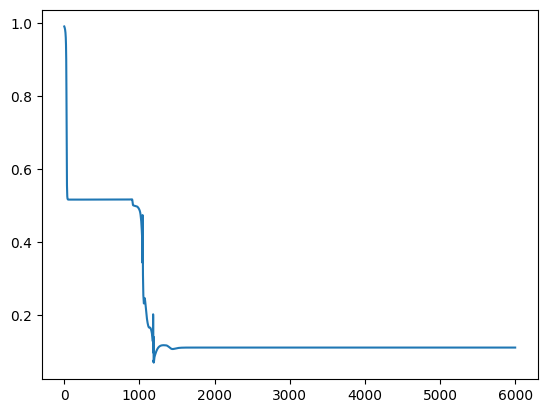

In [ ]:
from PIL import Image
from numpy.linalg import inv
import scipy.special
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

def convert(nombre):
    f = Image.open(nombre)
    new_img = f.resize((30,30))
    rgb_im = new_img.convert('RGB')
    width, height = rgb_im.size
    colors = []

    for x in range(0, width):
        for y in range(0, height):
            r, g, b = rgb_im.getpixel((x, y))
            colors.append([r, g, b])

    tam = len(colors)
    patron = np.array(zeros((tam, 3), float))
    for i in range(0, tam):
        patron[i, :] = [float(color) / 255.0 for color in colors[i]]

    return patron.reshape(-1, 1)

# uno=convert('/content/uno1.png')
# uno_=convert('/content/uno2.png')
# cero=convert('/content/cero1.png')
# cero_=convert('/content/cero2.png')
# unoprueba=convert('/content/unoprueba.png')
# ceroprueba=convert('/content/ceroprueba.png')
# sieteprueba=convert('/content/sieteprueba.png')
# ochoprueba=convert('/content/ochoprueba.png')

triangulo1= convert('/content/triangulo1.png')
cuadrado1=convert('/content/cuadrado1.png')
triangulo2= convert('/content/triangulo2.png')
cuadrado2=convert('/content/cuadrado2.png')
triangulo3= convert('/content/triangulo3.png')
cuadrado3=convert('/content/cuadrado3.png')
trianguloprueba= convert('/content/trianguloprueba1.png')
cuadradoprueba=convert('/content/cuadradoprueba.png')

def sigmoid(x):
    return scipy.special.expit(x)

a=0.1
te=900*3
ti=10
tf=1

O=np.ones((tf,1))
O2=np.zeros((tf,1))

w1=np.random.rand(ti,te)
w2=np.random.rand(tf,ti)

lamb=0.01
def entrena(w1, w2, En, O):
    Si = sigmoid(np.dot(w1, En))
    S = sigmoid(np.dot(w2, Si))
    e = O - S
    ei = np.dot(w2.T, e)
    w2 += a*(np.dot(e*S*(1.-S), Si.T) - lamb * w2)
    w1 += a*(np.dot(ei*Si*(1.-Si), En.T) - lamb * w1)
    return w1, w2, np.mean(e)

def clasifica(w1,w2,En):
    Si=sigmoid(np.dot(w1,En))
    S=sigmoid(np.dot(w2,Si))
    return S

lis_error=[]
for i in range(0,6000):
    w1,w2,error=entrena(w1,w2,triangulo1,O)
    w1,w2,error=entrena(w1,w2,cuadrado1,O2)
    w1,w2,error=entrena(w1,w2,triangulo2,O)
    w1,w2,error=entrena(w1,w2,cuadrado2,O2)
    w1,w2,error=entrena(w1,w2,triangulo3,O)
    w1,w2,error=entrena(w1,w2,cuadrado3,O2)
    lis_error.append(abs(error))

print(clasifica(w1,w2,trianguloprueba))
print(clasifica(w1,w2,cuadradoprueba))
plt.plot(lis_error)
plt.show()
